In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv("train.csv")
df1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
df1.info() #no column contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

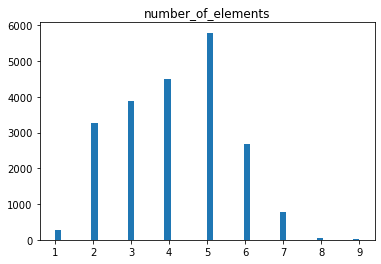

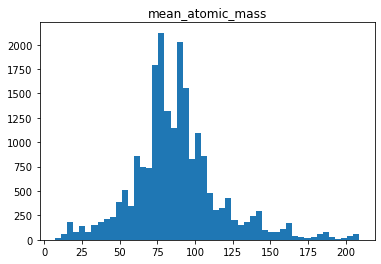

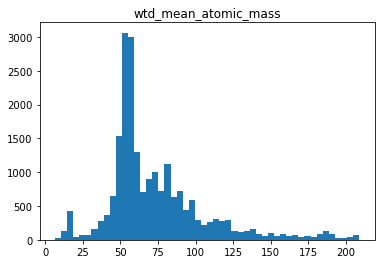

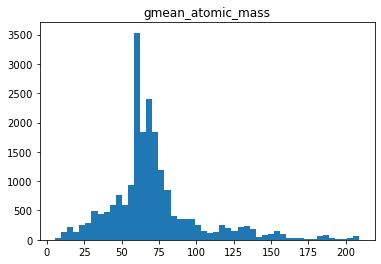

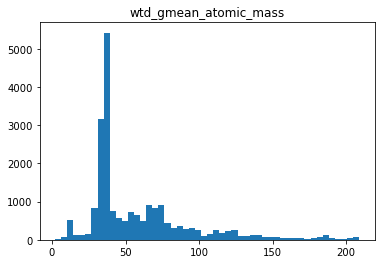

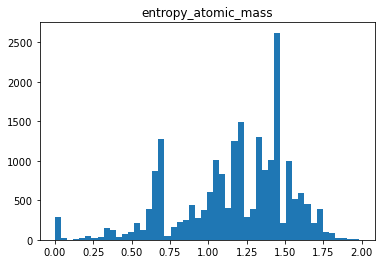

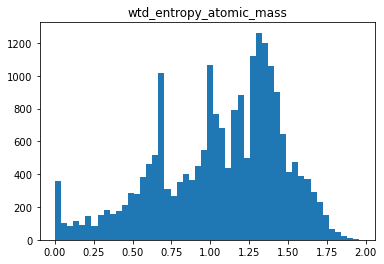

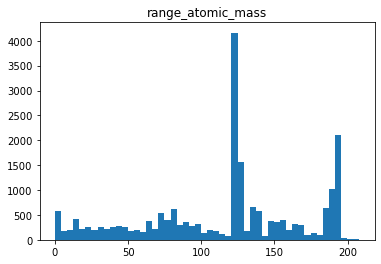

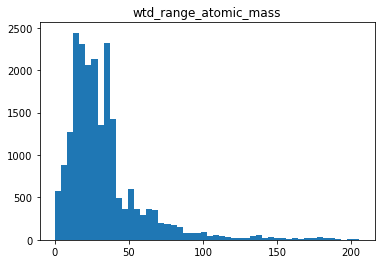

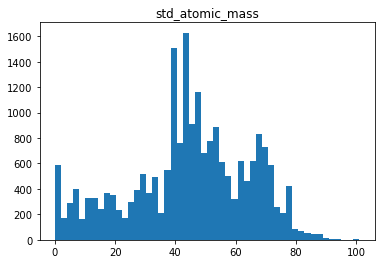

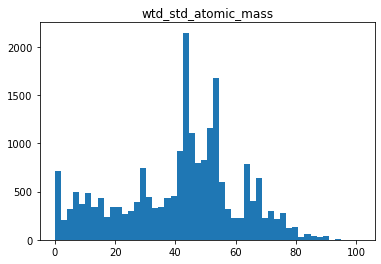

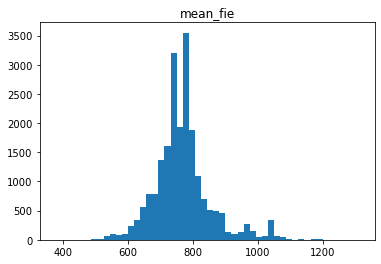

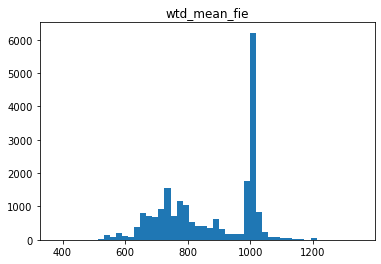

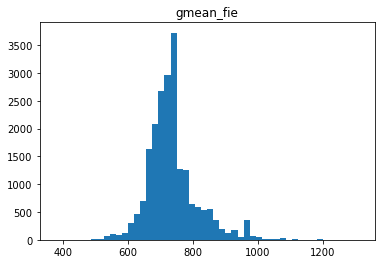

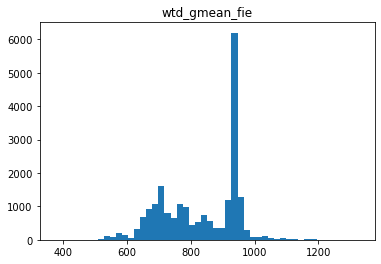

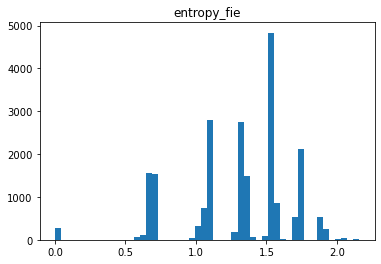

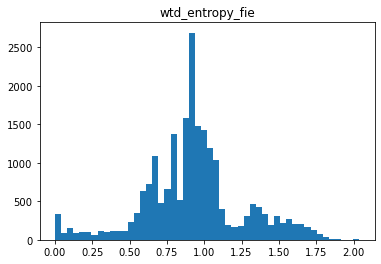

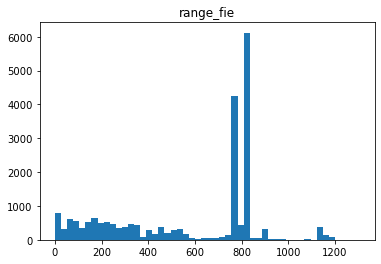

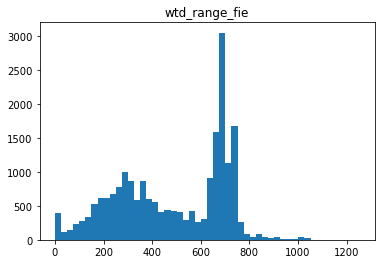

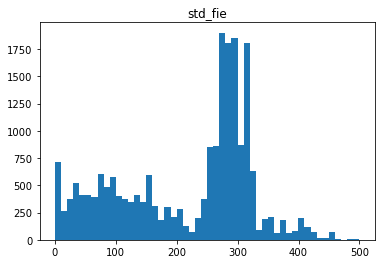

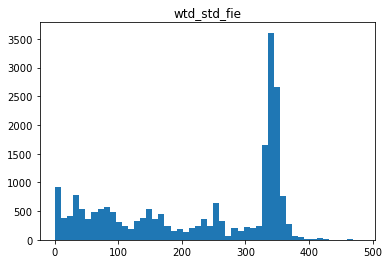

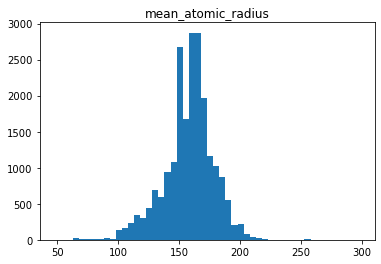

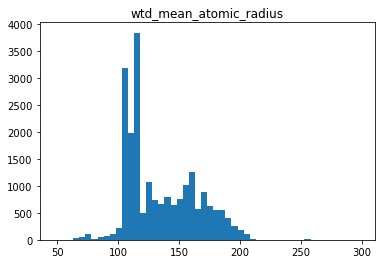

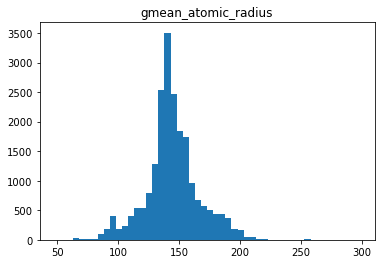

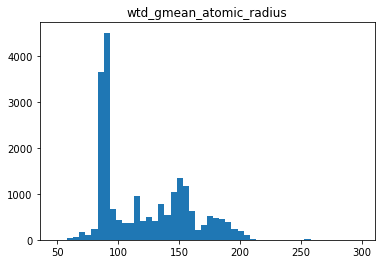

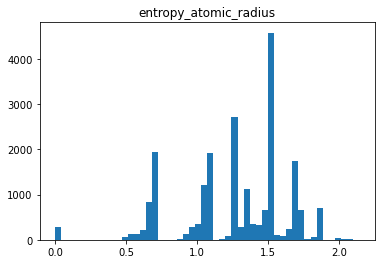

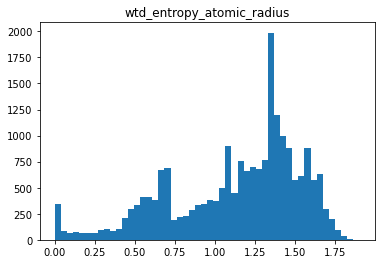

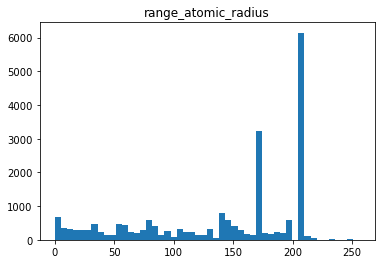

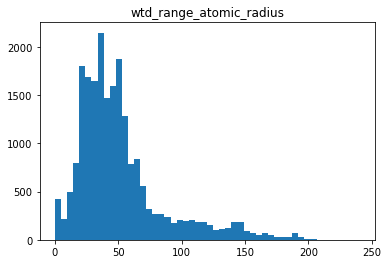

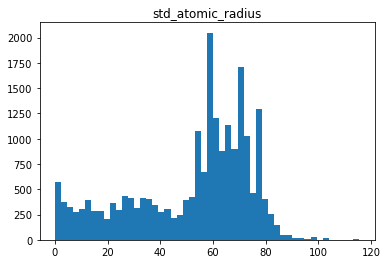

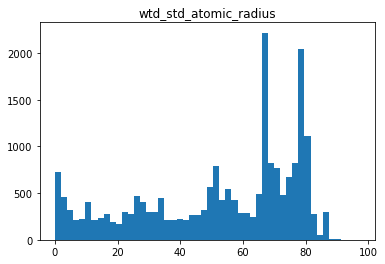

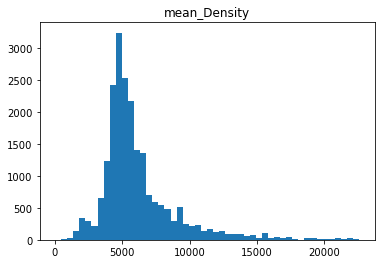

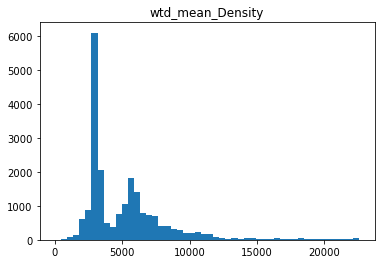

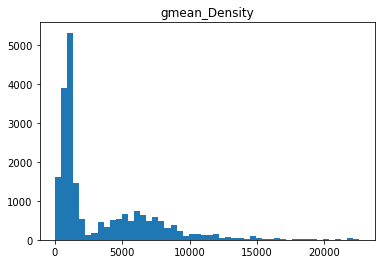

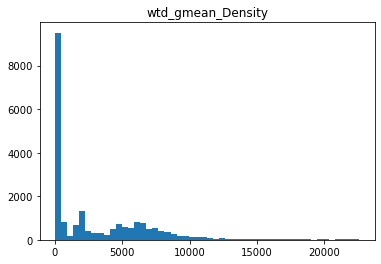

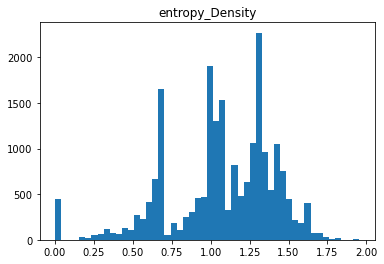

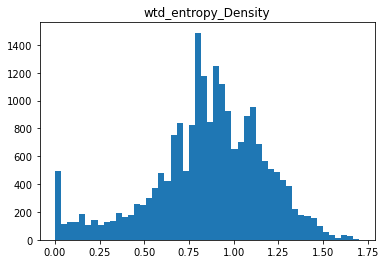

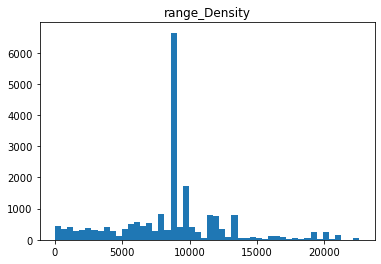

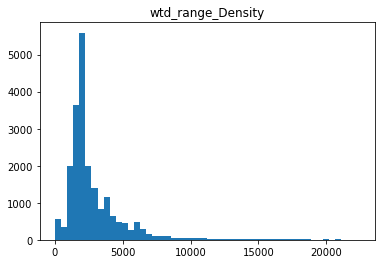

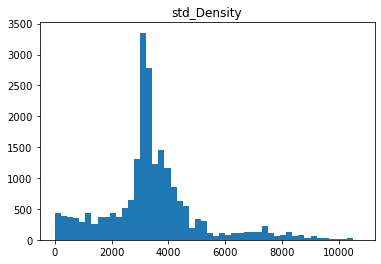

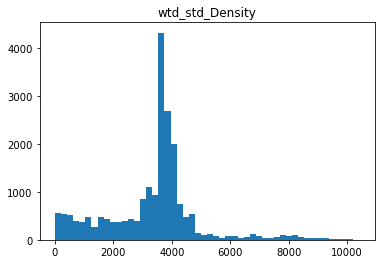

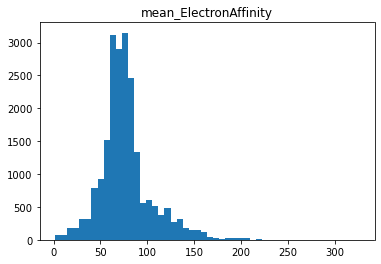

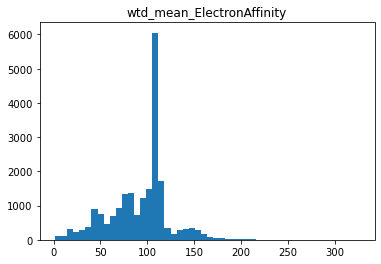

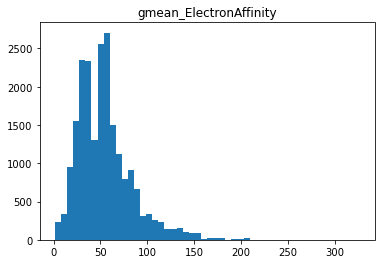

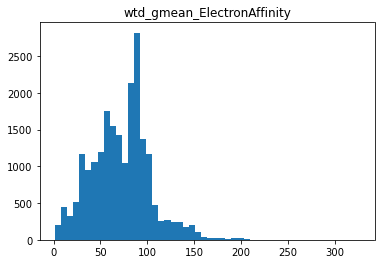

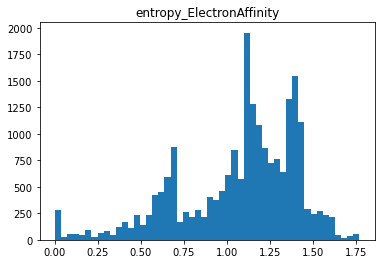

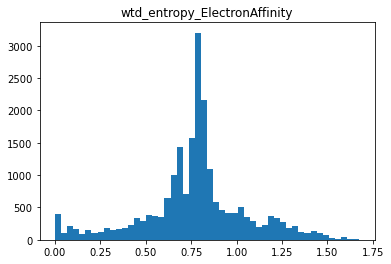

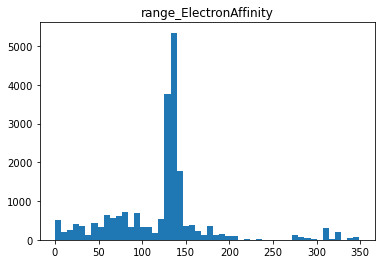

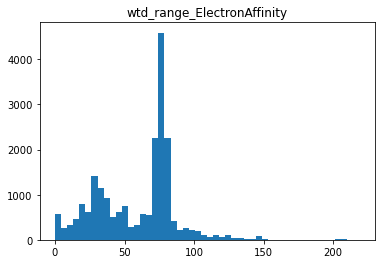

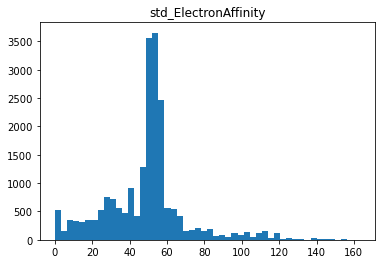

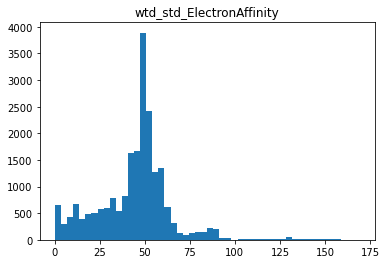

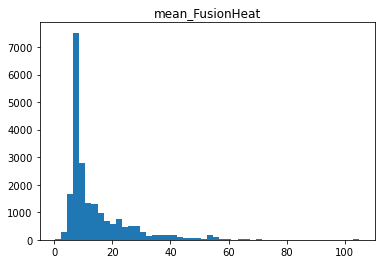

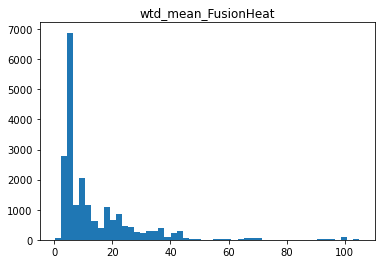

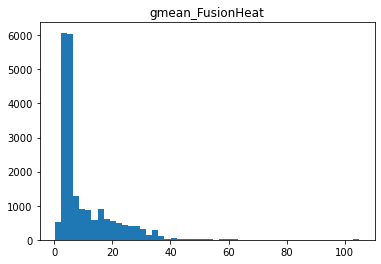

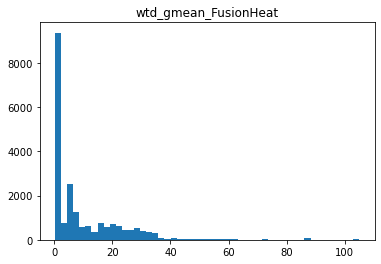

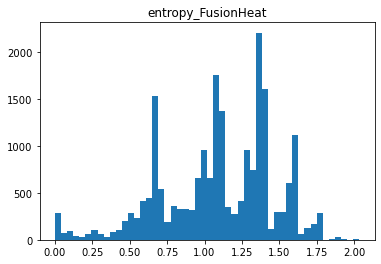

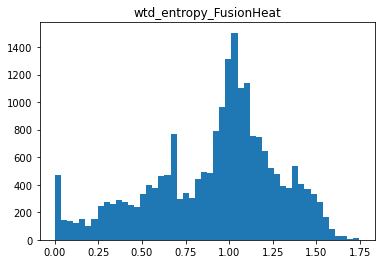

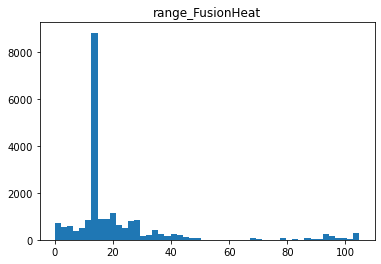

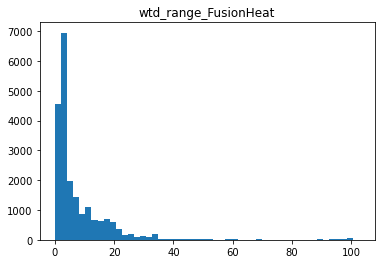

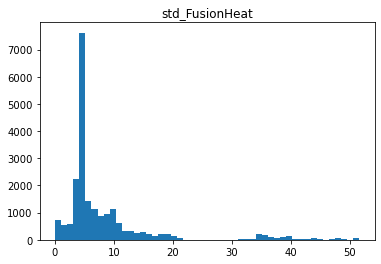

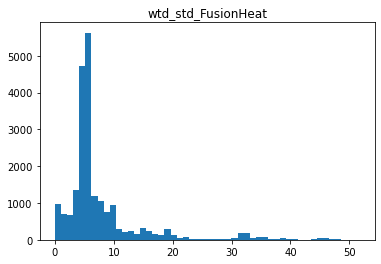

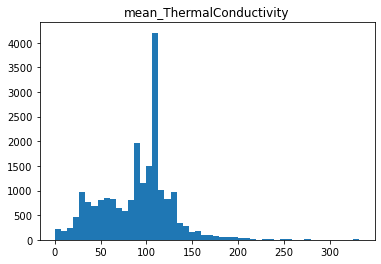

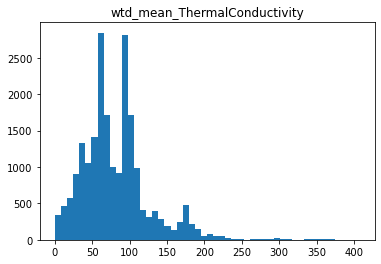

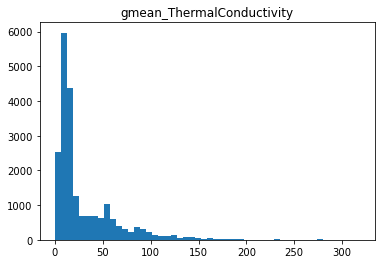

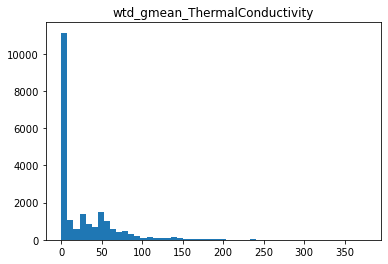

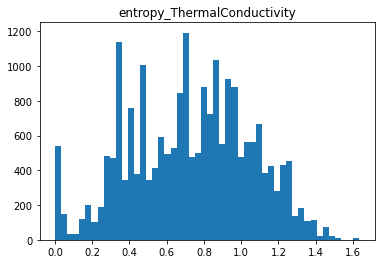

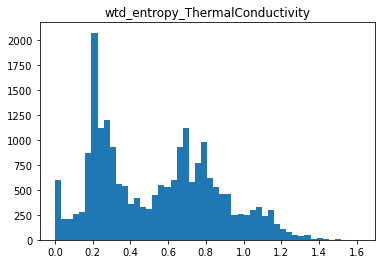

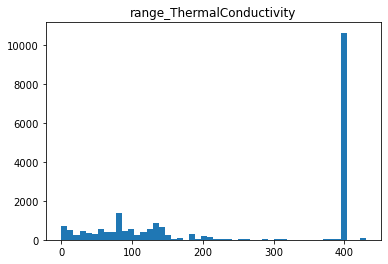

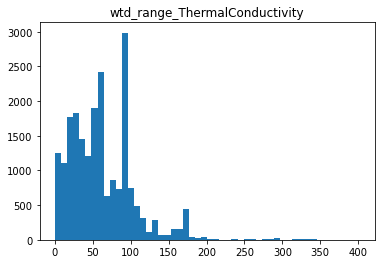

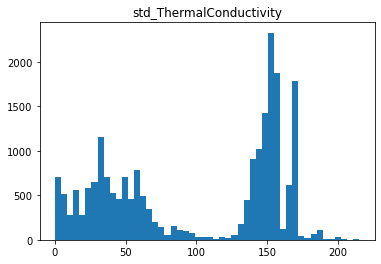

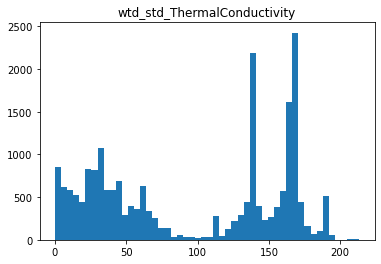

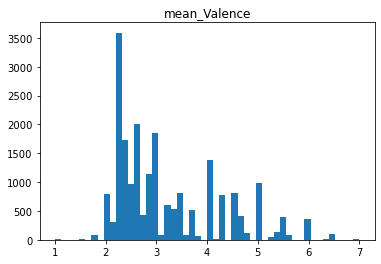

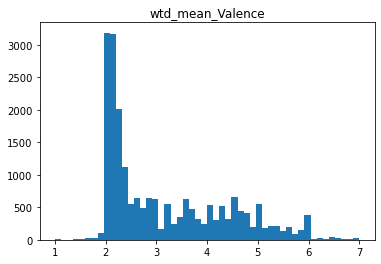

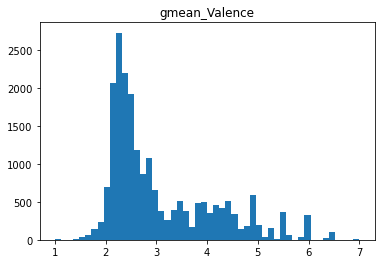

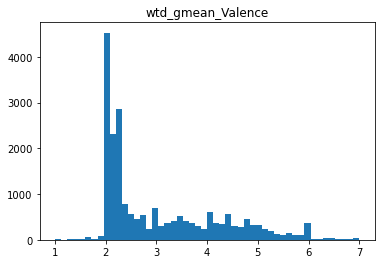

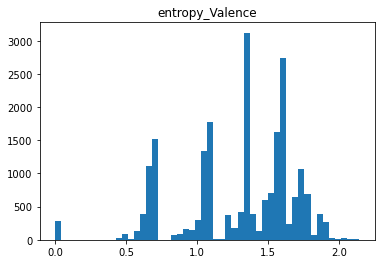

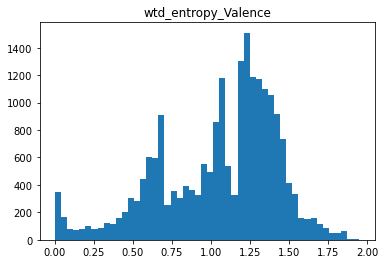

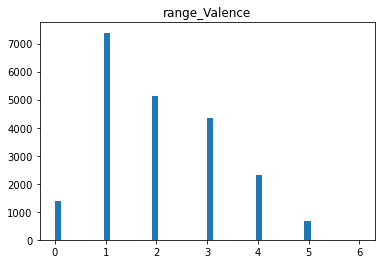

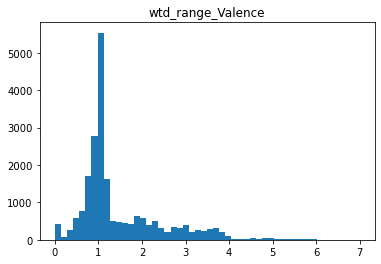

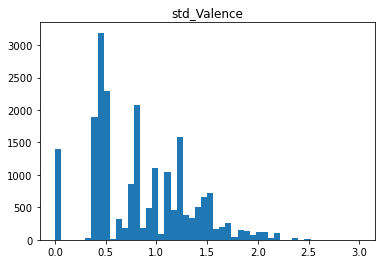

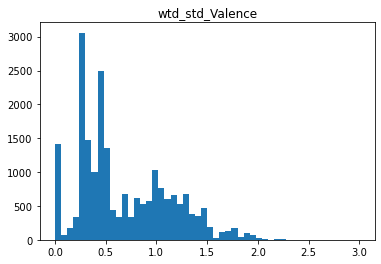

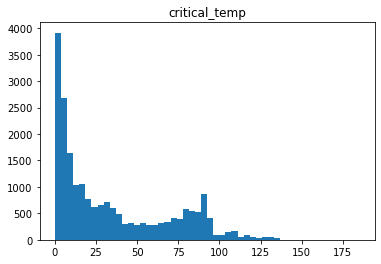

In [4]:
columns = list(df1.columns)

for col in columns:
    plt.hist(df1[col], bins=50)
    plt.title(col)
    plt.show()
    
#most materials are made of 4 or 5 elements
#most critical temperatures fall within ~ [0,10] K ([-273,-263] Celsius)
#many attributes have very different scales (e.g. mean atomic mass 0-200, entropy atomic mass 0-2, mean density 0-20000), which
#could pose a problem to our model, so it is important to normalize our data later on

In [5]:
corr_matrix = df1.corr()
corr_matrix["critical_temp"].sort_values(ascending=False)

#thermal conductivity and atomic radius seem most positively correlated with critical temperature
#most negatively correlated are the density and especially the valence

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
                                 ...   
gmean_Density                 -0.541684
gmean_Valence                 -0.573068
mean_Valence                  -0.600085
wtd_gmean_Valence             -0.615653
wtd_mean_Valence              -0.632401
Name: critical_temp, Length: 82, dtype: float64

array([[<AxesSubplot:xlabel='critical_temp', ylabel='critical_temp'>,
        <AxesSubplot:xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>,
        <AxesSubplot:xlabel='range_ThermalConductivity', ylabel='critical_temp'>,
        <AxesSubplot:xlabel='range_atomic_radius', ylabel='critical_temp'>,
        <AxesSubplot:xlabel='gmean_Density', ylabel='critical_temp'>,
        <AxesSubplot:xlabel='mean_Valence', ylabel='critical_temp'>,
        <AxesSubplot:xlabel='wtd_mean_Valence', ylabel='critical_temp'>],
       [<AxesSubplot:xlabel='critical_temp', ylabel='wtd_std_ThermalConductivity'>,
        <AxesSubplot:xlabel='wtd_std_ThermalConductivity', ylabel='wtd_std_ThermalConductivity'>,
        <AxesSubplot:xlabel='range_ThermalConductivity', ylabel='wtd_std_ThermalConductivity'>,
        <AxesSubplot:xlabel='range_atomic_radius', ylabel='wtd_std_ThermalConductivity'>,
        <AxesSubplot:xlabel='gmean_Density', ylabel='wtd_std_ThermalConductivity'>,
        <AxesSubplot:xl

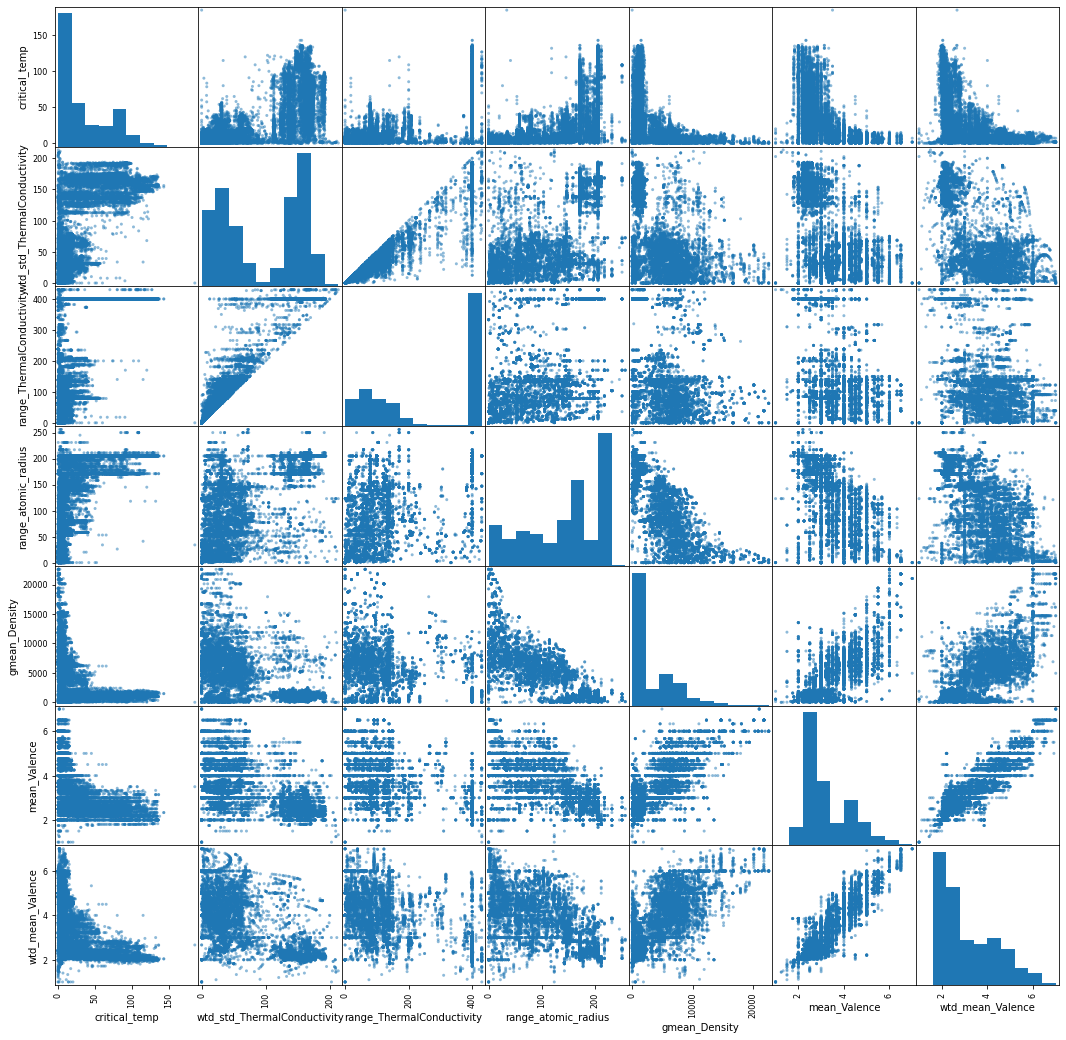

In [6]:
from pandas.plotting import scatter_matrix

#let's select some of the most promising attributes and plot them against critical_temp

attributes = ["critical_temp", "wtd_std_ThermalConductivity", "range_ThermalConductivity", "range_atomic_radius", 
              "gmean_Density", "mean_Valence", "wtd_mean_Valence"]
scatter_matrix(df1[attributes], figsize=(18, 18))

In [7]:
#there is an observation that looks like an obvious outlier (critical temperature above 175), so let's find it

outlier = df1[df1["critical_temp"] > 175]
print(outlier)

#should we remove it?

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
20573                   2          16.53647             11.360293   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
20573           5.685033               3.193745             0.136394   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
20573                 0.224622           31.05706              10.016373   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
20573         15.52853  ...          2.666667        2.44949   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
20573           1.817121         0.410116             0.562335              5   

       wtd_range_Valence  std_Valence  wtd_std_Valence  critical_temp  
20573           1.333333          2.5         2.357023          185.0  

[1 rows x 82 columns]


In [8]:
#also, some of the attributes are the transformation of other related attributes 
#e.g. mean valence and wtd mean valence, range thermal conductivity and wtd std thermal conductivity
#and from the graph it looks like there is a very strong correlation between these two pairs

print(corr_matrix.loc["mean_Valence", "wtd_mean_Valence"], 
      corr_matrix.loc["range_ThermalConductivity", "wtd_std_ThermalConductivity"]) #as expected

0.9371028768425232 0.9654488220794657


In [9]:
print(corr_matrix) #more specifically

#as there are many strongly correlated variables in this dataset, doing a PCA is appropriate

                       number_of_elements  mean_atomic_mass  \
number_of_elements               1.000000         -0.141923   
mean_atomic_mass                -0.141923          1.000000   
wtd_mean_atomic_mass            -0.353064          0.815977   
gmean_atomic_mass               -0.292969          0.940298   
wtd_gmean_atomic_mass           -0.454525          0.745841   
...                                   ...               ...   
range_Valence                    0.231874         -0.107450   
wtd_range_Valence               -0.447770          0.168633   
std_Valence                      0.105365         -0.080279   
wtd_std_Valence                  0.035216         -0.081253   
critical_temp                    0.601069         -0.113523   

                       wtd_mean_atomic_mass  gmean_atomic_mass  \
number_of_elements                -0.353064          -0.292969   
mean_atomic_mass                   0.815977           0.940298   
wtd_mean_atomic_mass               1.000000  

In [10]:
from sklearn.model_selection import train_test_split

features = list(df1.columns)[:-1]
x = df1.loc[:, features].values
y = df1.loc[:,['critical_temp']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90) #our threshold
pca.fit(X_train_scaled)
tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()
print("Actual Eigenvalues:", pca.singular_values_)
for i,comp in enumerate(pca.components_):
    print("PC",i, "-->", comp)
    
#we need 12 PC to meet the 90% variance explained threshold

PC0 - Variance explained:  0.3897 - Total Variance:  0.3897
PC1 - Variance explained:  0.1037 - Total Variance:  0.4934
PC2 - Variance explained:  0.0960 - Total Variance:  0.5894
PC3 - Variance explained:  0.0793 - Total Variance:  0.6687
PC4 - Variance explained:  0.0591 - Total Variance:  0.7278
PC5 - Variance explained:  0.0376 - Total Variance:  0.7654
PC6 - Variance explained:  0.0359 - Total Variance:  0.8012
PC7 - Variance explained:  0.0308 - Total Variance:  0.8320
PC8 - Variance explained:  0.0235 - Total Variance:  0.8555
PC9 - Variance explained:  0.0199 - Total Variance:  0.8753
PC10 - Variance explained:  0.0185 - Total Variance:  0.8938
PC11 - Variance explained:  0.0144 - Total Variance:  0.9082

Actual Eigenvalues: [670.59502835 345.87174847 332.8470296  302.47343705 261.24954892
 208.15873923 203.4210977  188.41495148 164.62417366 151.37684826
 146.065938   128.8295941 ]
PC 0 --> [-0.15553661  0.05169809  0.09968985  0.08309954  0.12028548 -0.14636475
 -0.15647998 -0

In [ ]:
#CHATGPT

# If you find that you need 12 components to explain more than 90% of the variance in your dataset, it's worth considering whether PCA is the most appropriate method for your analysis.

# PCA is typically used to reduce the dimensionality of a dataset, while retaining as much of the variance as possible. However, if you need to retain 12 components to explain more than 90% of the variance, it suggests that your dataset may not have a strong underlying structure that can be captured by a lower-dimensional representation.

# One possibility is that your dataset may not be amenable to dimensionality reduction techniques like PCA, and instead may require more complex modeling approaches. Alternatively, it may be worth examining the features in your dataset and considering whether some of them can be eliminated or combined in a way that reduces the dimensionality of the problem without sacrificing too much variance.

# Ultimately, the best approach will depend on the specifics of your dataset and the goals of your analysis. It may be worth consulting with a data analyst or machine learning expert to help determine the most appropriate modeling approach for your data.

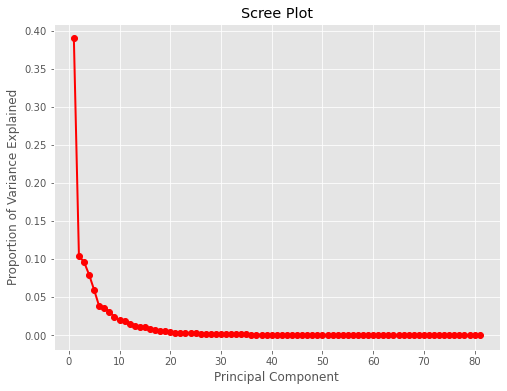

In [44]:
cov_matrix = X_train_scaled.T @ X_train_scaled
eig_vals = np.linalg.eigvals(cov_matrix)

variance_ratio = eig_vals / sum(eig_vals)

fig = plt.figure(figsize=(8, 6))
sing_vals = np.arange(len(variance_ratio)) + 1
plt.plot(sing_vals, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

#the long tail of this scree plot suggests that the dataset has 
#a lot of noise or that the PCA is in fact not appropriate for this dataset -> SUV decomposition?